In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 
import matplotlib.ticker as mticker
import seaborn as sns
from scipy.stats import linregress
import copy

In [3]:
df_spotify = pd.read_csv("/Users/apple/new_spotify.csv")

df_spotify.head(10)

,Song-Artist,Track,Artist,Album Name,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,...,Soundcloud Streams,Shazam Counts,Deezer Playlist Reach,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Spotify Popularity,Explicit Track,All Time Rank,Proportion of Streams vs Playlist Count
0,asitwasharrystyles,As It Was,Harry Styles,As It Was,2022-03-31,157.75,6.6B,407.1K,169.8M,800899315,...,0,14967379,12907852,455,330,189,87.0,False,20,16213.639607
1,staythekidlaroi,STAY (with Justin Bieber),The Kid LAROI,STAY (with Justin Bieber),2021-07-09,147.75,6.2B,463.5K,137.0M,1256973582,...,36341585,15411173,5792114,659,167,148,78.0,True,27,13408.336242
2,flowersmileycyrus,Flowers,Miley Cyrus,Flowers - Single,2023-01-12,167.80,6.1B,269.8K,136.6M,1096100899,...,0,11822942,24684248,394,264,210,85.0,False,4,22508.372206
3,saveyourtearstheweeknd,Save Your Tears,The Weeknd,After Hours,2020-03-20,55.10,5.5B,490.9K,135.5M,751142333,...,27647015,19027495,5016209,662,241,85,80.0,True,371,11286.802444
4,takemetochurchhozier,Take Me to Church,Hozier,Take Me To Church,2013-09-16,35.70,5.1B,351.9K,100.6M,1874694441,...,277623,29306436,2865897,314,134,54,78.0,False,1293,14460.369225
5,allofmejohnlegend,All of Me,John Legend,Love In The Future (South Africa Tour Edition),2012-01-01,46.65,4.8B,259.6K,144.9M,3075559068,...,162140441,28058207,2030663,299,230,107,80.0,False,487,18346.898121
6,lethergopassenger,Let Her Go,Passenger,Let Her Go,2012-07-27,46.50,4.5B,290.5K,71.9M,4390962950,...,57076563,33584600,881535,345,115,27,73.0,False,484,15507.560618
7,doiwannaknow?arcticmonkeys,Do I Wanna Know?,Arctic Monkeys,AM,2013-01-01,28.60,4.4B,373.5K,93.2M,2177467084,...,0,10708249,711857,156,114,43,81.0,False,1837,11719.498736
8,driverslicenseoliviarodrigo,drivers license,Olivia Rodrigo,drivers license,2021-01-08,66.20,4.4B,260.7K,72.8M,984811734,...,0,11006064,1182516,398,216,72,79.0,True,226,16761.896862
9,good4uoliviarodrigo,good 4 u,Olivia Rodrigo,good 4 u,2021-05-14,82.80,4.3B,322.2K,75.9M,773591065,...,19263268,7171230,1803215,448,104,104,79.0,True,163,13454.954324


In [4]:
#Vizualization of artists with the least streams on spotify but the highest streams on other platforms 

df_spotify_1 = df_spotify.copy()

#Columns that need to be converted
cols_to_convert = [
    'YouTube Views',
    'YouTube Likes',
    'TikTok Views',
    'TikTok Likes',
    'Pandora Streams',
    'Shazam Counts',
    'Soundcloud Streams']

#Looping through each
for col in cols_to_convert:
    df_spotify_1[col] = (df_spotify_1[col].replace({'B': 'e9', 'M': 'e6', 'K': 'e3'}, regex=True).astype(float))

averages = df_spotify_1[cols_to_convert].mean()
averages_table = averages.reset_index()
averages_table.columns = ['Column', 'Average']

print(averages_table)



               Column       Average
0       YouTube Views  3.923393e+08
1       YouTube Likes  2.936146e+06
2        TikTok Views  8.662704e+08
3        TikTok Likes  8.484195e+07
4     Pandora Streams  7.144719e+07
5       Shazam Counts  2.319953e+06
6  Soundcloud Streams  4.500440e+06


In [5]:
#Masking to keep all values above the averages 
mask = (df_spotify_1[cols_to_convert] > averages).all(axis=1)

filtered_df = df_spotify_1[mask]

#Sorting to see the lowest spotify streams first 
filtered_sorted = filtered_df.sort_values(by='Spotify Streams', ascending=True) 

print(filtered_sorted[['Artist', 'Spotify Streams'] + cols_to_convert].head(10))

            Artist Spotify Streams  YouTube Views  YouTube Likes  \
456          Drake            1.1B   4.099395e+08      3134200.0   
399  Nelly Furtado            1.2B   8.102978e+08      4900990.0   
378    Chris Brown            1.2B   6.999318e+08      6139127.0   
311         Regard            1.3B   5.640228e+08      3884141.0   
300   XXXTENTACION            1.4B   1.002423e+09     14134657.0   
264     Tate McRae            1.4B   7.062847e+08      7820244.0   
260  Martin Garrix            1.5B   1.487689e+09     13819002.0   
241   Lana Del Rey            1.5B   1.016874e+09      8977117.0   
155          Gotye            1.8B   2.729174e+09     22532779.0   
154     Ed Sheeran            1.8B   9.587909e+08      7686994.0   

     TikTok Views  TikTok Likes  Pandora Streams  Shazam Counts  \
456  2.167217e+09   223929731.0      283709268.0      4021390.0   
399  1.795502e+09   255818121.0      483978772.0      6254052.0   
378  2.436202e+09   252070540.0      101759650.0  

In [27]:
table = filtered_sorted[['Artist', 'Spotify Streams'] + cols_to_convert].head(20)
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')
print(table)


            Artist Spotify Streams Spotify Streams  YouTube Views  \
456          Drake            1.1B            1.1B    409,939,539   
399  Nelly Furtado            1.2B            1.2B    810,297,837   
378    Chris Brown            1.2B            1.2B    699,931,779   
311         Regard            1.3B            1.3B    564,022,753   
300   XXXTENTACION            1.4B            1.4B  1,002,422,657   
264     Tate McRae            1.4B            1.4B    706,284,693   
260  Martin Garrix            1.5B            1.5B  1,487,688,794   
241   Lana Del Rey            1.5B            1.5B  1,016,873,717   
155          Gotye            1.8B            1.8B  2,729,174,469   
154     Ed Sheeran            1.8B            1.8B    958,790,883   
124    Roddy Ricch            1.9B            1.9B    441,257,231   
134       24kGoldn            1.9B            1.9B    747,126,783   
119    Alan Walker            1.9B            1.9B    439,888,055   
105         Halsey            2.0B

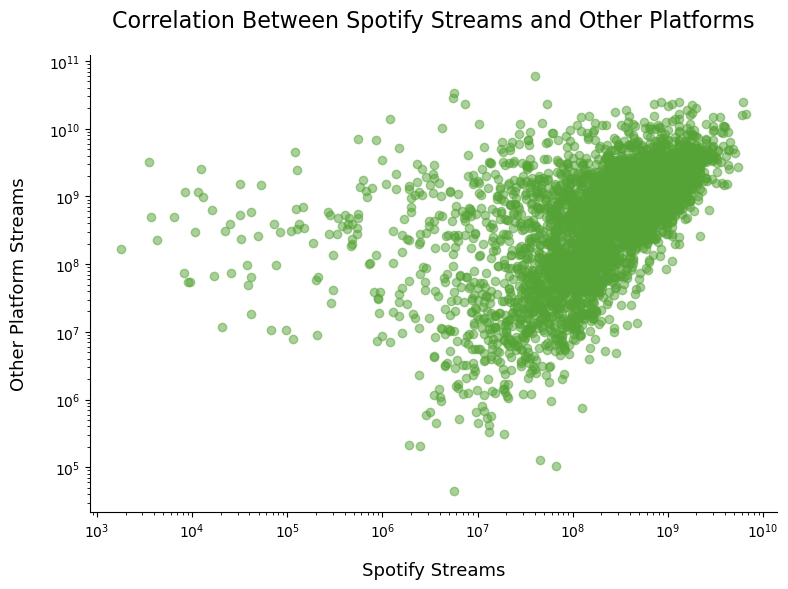

In [ ]:

#Columns to include in "other platforms"
other_cols = ['YouTube Views', 'TikTok Views', 'Soundcloud Streams', 'Shazam Counts', 'Pandora Streams']

#Converting columns to numeric
for col in ['Spotify Streams'] + other_cols:
    df_spotify[col] = df_spotify[col].replace({'B': 'e9', 'M': 'e6', 'K': 'e3'}, regex=True).astype(float)

#Total of other platform streams
df_spotify['Other Platform Streams'] = df_spotify[other_cols].sum(axis=1)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_spotify['Spotify Streams'], df_spotify['Other Platform Streams'], alpha=0.5, color = '#55a336')


plt.xlabel('Spotify Streams', labelpad=15, fontsize = 13)
plt.ylabel('Other Platform Streams', labelpad=15, fontsize = 13)
plt.title('Correlation Between Spotify Streams and Other Platforms', fontsize = 16, pad=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()


Overall a positive correlation, there is a tendency for higher Spotify streams to also have higher streams on other platforms.
As you can see, we have a wide spread, so some artists have a tendency to preform better on some platforms than others. The most popular artists are likely to be in this big cluster, indicating high performance overall. Scale is logarithmic, so closest to the origin, we have 1,000 streams, at the far right, we have 10 billion. 

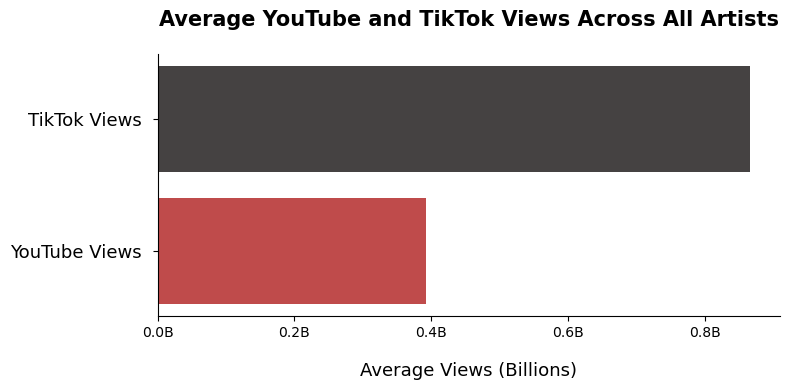

In [82]:
cols_to_avg = ['YouTube Views', 'TikTok Views']

#Converting to numeric
for col in cols_to_avg:
    df_spotify[col] = df_spotify[col].replace({'B': 'e9', 'M': 'e6', 'K': 'e3'}, regex=True).astype(float)

#Averages
averages = df_spotify[cols_to_avg].mean()

plt.figure(figsize=(8, 4))
plt.barh(averages.index, averages.values, color=['#bf4b4b', '#454242'])

#Formating x-axis to billions
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda val, _: f'{val/1e9:.1f}B'))

plt.xlabel('Average Views (Billions)', labelpad=16, fontsize=13)
plt.title('Average YouTube and TikTok Views Across All Artists', weight = 'bold', pad=20, fontsize=15)

plt.yticks(fontsize=13)
plt.tick_params(axis='y', pad=8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

This depicts the Average Youtube and Tiktok views across all artists, giving us a good picture of what the average views are for each artist in the spotify data. 

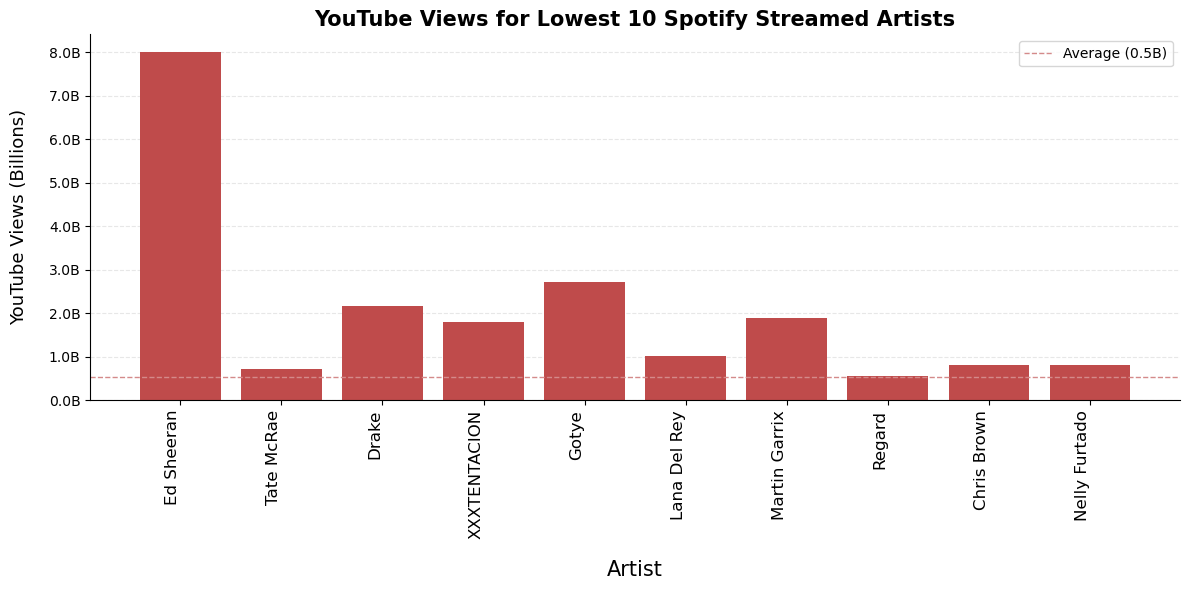

In [106]:

df_plot = df_spotify_1.copy()

#Converting YouTube Views to numeric
df_plot['YouTube Views'] = (df_plot['YouTube Views'].replace({'B': 'e9', 'M': 'e6', 'K': 'e3'}, regex=True).astype(float))

#Filtered list
artists_filtered = df_plot.loc[df_plot['Artist'].isin(filtered_sorted['Artist'].head(10))]

#Average YouTube Views
yt_avg_filtered = artists_filtered['YouTube Views'].mean()

plt.figure(figsize=(12, 6))
plt.bar(artists_filtered['Artist'], artists_filtered['YouTube Views'], color='#bf4b4b', alpha = 1)

#Average line
plt.axhline(y=yt_avg_filtered, color='#d48a8a', linestyle='--', linewidth=1, label=f'Average ({yt_avg_filtered/1e9:.1f}B)')

#Formating y-axis to billions
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda val, _: f'{val/1e9:.1f}B'))

plt.xlabel('Artist', labelpad=15, fontsize=15)
plt.ylabel('YouTube Views (Billions)', labelpad=15, fontsize=13)
plt.title('YouTube Views for Lowest 10 Spotify Streamed Artists', weight = 'bold', fontsize = 15)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.gca().set_axisbelow(True)

plt.grid(axis = 'y', linestyle = '--', alpha = 0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

plt.tight_layout()
plt.show()

What we are looking at are the 10 artists with the lowest amount of streams on spotify but the highest amount of youtube views. 

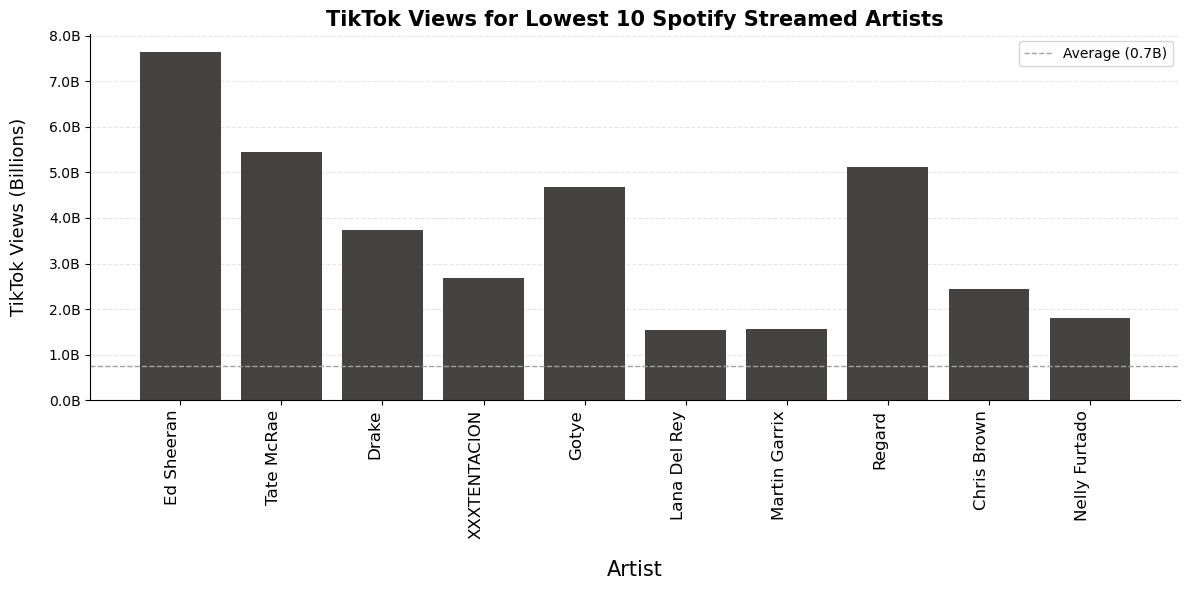

In [102]:
# Converting TikTok Views to numeric
df_plot['TikTok Views'] = (df_plot['TikTok Views'].replace({'B': 'e9', 'M': 'e6', 'K': 'e3'}, regex=True).astype(float))

# Get lowest 10 Spotify-streamed artists from your filtered list
artists_filtered = df_plot.loc[df_plot['Artist'].isin(filtered_sorted['Artist'].head(10))]

#Average TikTok Views 
tiktok_avg_filtered = artists_filtered['TikTok Views'].mean()

plt.figure(figsize=(12, 6))
plt.bar(artists_filtered['Artist'], artists_filtered['TikTok Views'], color='#454242')

# Add dashed average line
plt.axhline(y=tiktok_avg_filtered, color='#a1a3a0', linestyle='--', linewidth=1, label=f'Average ({tiktok_avg_filtered/1e9:.1f}B)')

#Formating y-axis to billions
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda val, _: f'{val/1e9:.1f}B'))

plt.xlabel('Artist', labelpad=15, fontsize=15)
plt.ylabel('TikTok Views (Billions)', labelpad=15, fontsize=13)
plt.title('TikTok Views for Lowest 10 Spotify Streamed Artists', weight = 'bold', fontsize = 15)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.gca().set_axisbelow(True)

plt.grid(axis = 'y', linestyle = '--', alpha = 0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

plt.tight_layout()
plt.show()


What we are looking at are the 10 artists with the lowest amount of streams on spotify but the highest amount of TikTok views. 